# Module 1: Data Loading and Initial Exploration

## Student Details
#### Naveen Kumar (21BDS0266)

## 1.1 Data Loading
##### In this section, we will load the dataset from a specified URL and display the first few rows to understand its structure.


In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the dataset
data_url = "https://raw.githubusercontent.com/naveen2964/21BDS0266_EDA/refs/heads/main/diabetes.csv"
data = pd.read_csv(data_url)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


## 1.2 Initial Exploration
#### We will perform some initial exploratory data analysis (EDA) to understand the dataset better, including checking for missing values and basic statistics.

In [63]:

# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()

# Check for any missing values
data.isnull().sum()

# Display summary statistics for the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 54.1+ KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000
mean,3.850065,120.894531,69.105469,20.536458,79.799479,31.992578,0.471995,33.240885
std,3.368910,31.972618,19.355807,15.952218,115.244002,7.884160,0.331529,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## 1.3 Data Types and Conversion
#### Here we will check the data types of each column and convert them if necessary.

In [64]:

# Check the data types of each column
data.dtypes

# Convert specific columns to appropriate data types if necessary
data['Age'] = data['Age'].astype(int)


## 1.4 Handling Duplicates
#### In this section, we will check for duplicate entries and remove them if found.

In [65]:

# Check for duplicates
data.duplicated().sum()

# Remove duplicates if any
data = data.drop_duplicates()


# Module 2: Data Cleaning

## 2.1 Handling Missing Values
#### We will handle missing values by filling them with the mean for numeric columns and the mode for categorical columns.

In [66]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Remove non-numeric columns before applying mean imputation
numeric_data = data.drop(columns=non_numeric_columns)

# Fill missing values in numeric columns with the mean
numeric_data = numeric_data.fillna(numeric_data.mean())

# If needed, add the non-numeric columns back to the dataset
data.update(numeric_data)

# Fill missing values in categorical columns with the mode
for column in non_numeric_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

Non-numeric columns: Index(['Outcome'], dtype='object')


## 2.2 Outlier Detection and Removal
#### This section will identify and remove outliers using the Interquartile Range (IQR) method.

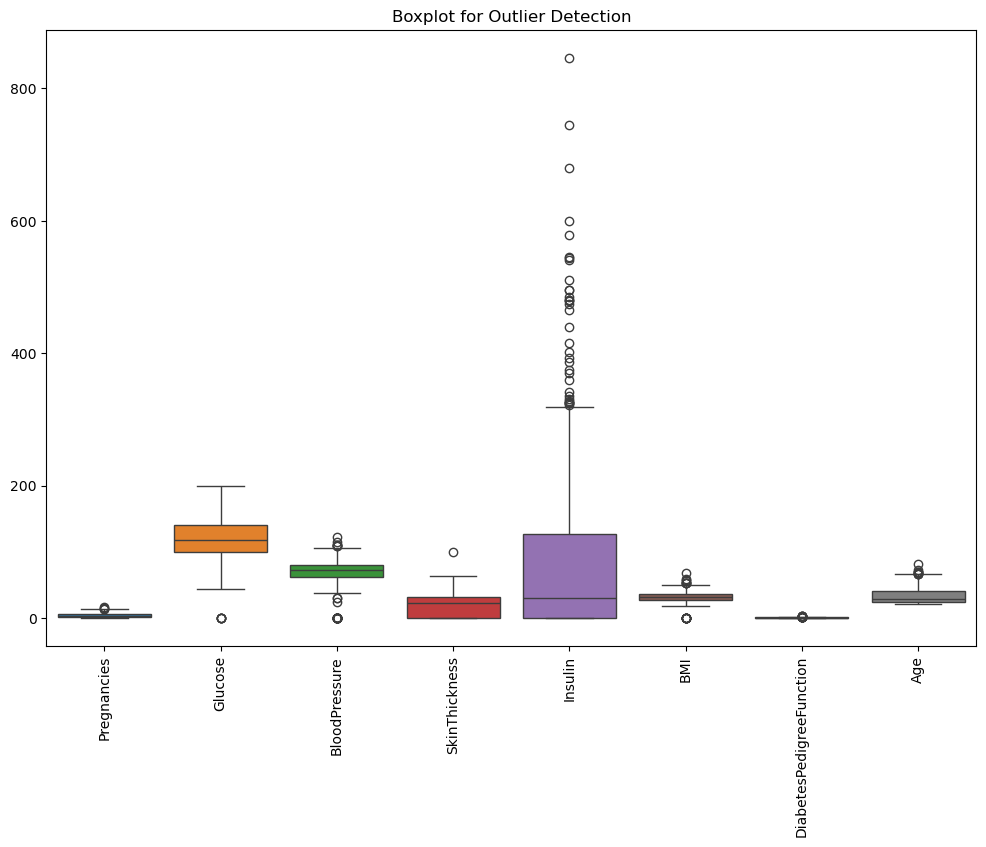

Outliers removed and data updated.


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Boxplot for numeric features to detect outliers
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=[np.number])  # Only select numeric columns
sns.boxplot(data=numeric_columns)
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

# Removing outliers using the IQR method on numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outlier_mask = ~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))

# Removing outliers
data_cleaned = numeric_columns[outlier_mask]

# Updating original dataframe with the cleaned data
data.update(data_cleaned)

print("Outliers removed and data updated.")

## 2.3 Data Normalization
#### We will normalize the numeric data using Min-Max scaling to bring all features into the range [0, 1].

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Replace non-numeric values ('?') with NaN
data.replace('?', np.nan, inplace=True)

# Convert all columns to numeric where possible
data = data.apply(pd.to_numeric, errors='coerce')

# Fill missing values (NaN) with the mean of each column
data.fillna(data.mean(), inplace=True)

# Normalize the dataset (numeric columns only)
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select numeric columns

# Apply MinMaxScaler to the numeric columns
data_normalized = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Display first few rows of the normalized data
data_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


## 2.4 Data Transformation
#### Log transformation of skewed data will be performed to reduce skewness and stabilize variance.

In [69]:
import numpy as np

# Log transformation of skewed data
data['Log_Glucose'] = np.log1p(data['Glucose'])



# Module 3: Data Visualization


## 3.1 Univariate Analysis
#### In this section, we will perform univariate analysis to visualize the distribution of individual features.

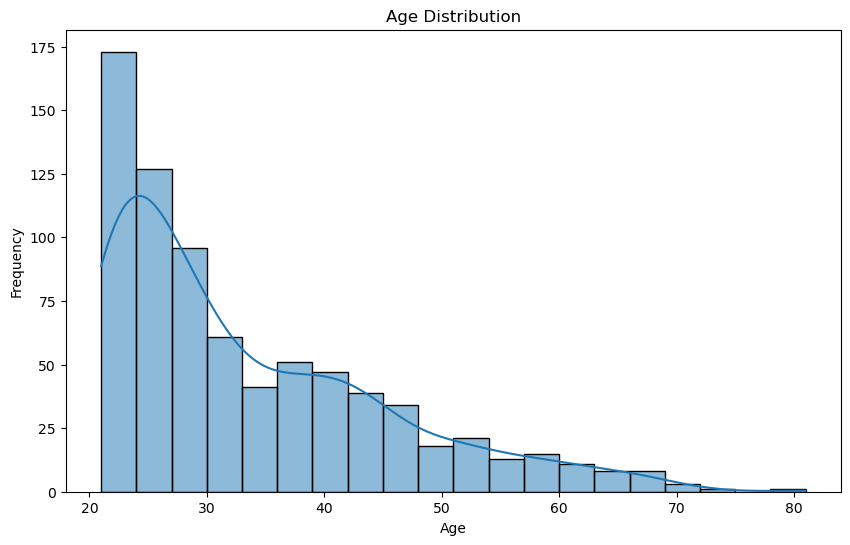

In [70]:

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## 3.2 Bivariate Analysis
#### This section includes bivariate analysis to explore relationships between pairs of features.

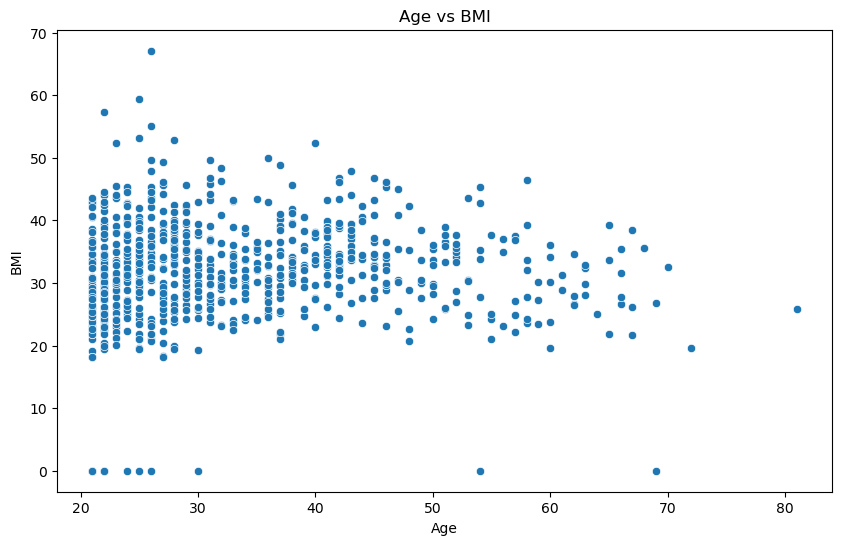

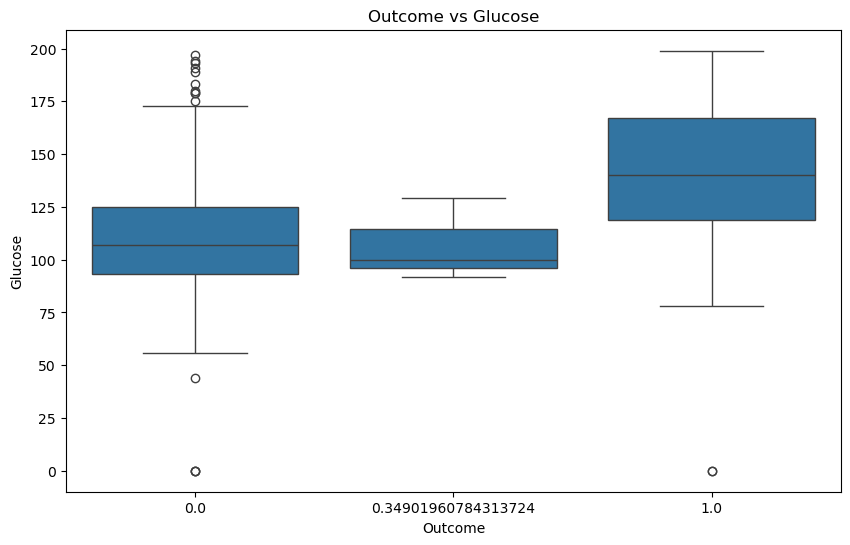

In [71]:

# Scatter plot for Age vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', data=data)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Boxplot for Outcome vs Glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Outcome vs Glucose')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


## 3.3 Correlation Analysis
#### We will analyze correlations between numeric features using a heatmap.

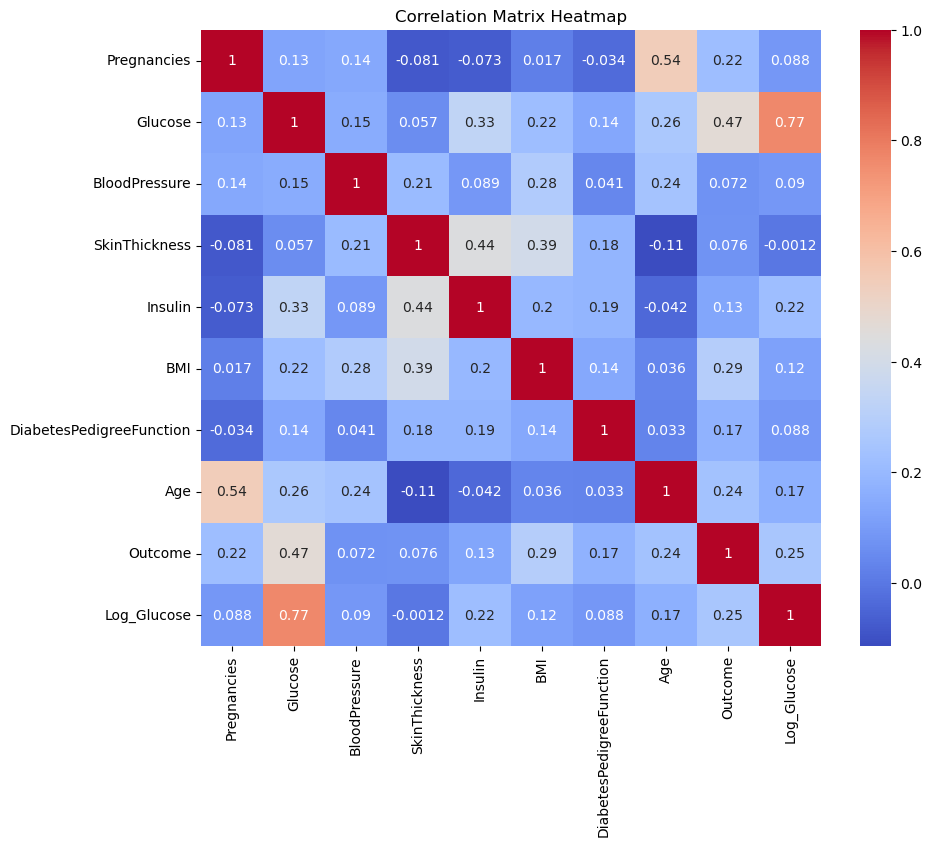

In [72]:

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## 3.4 Pair Plot Analysis
#### A pair plot will help visualize pairwise relationships between selected features, colored by 'Outcome'.

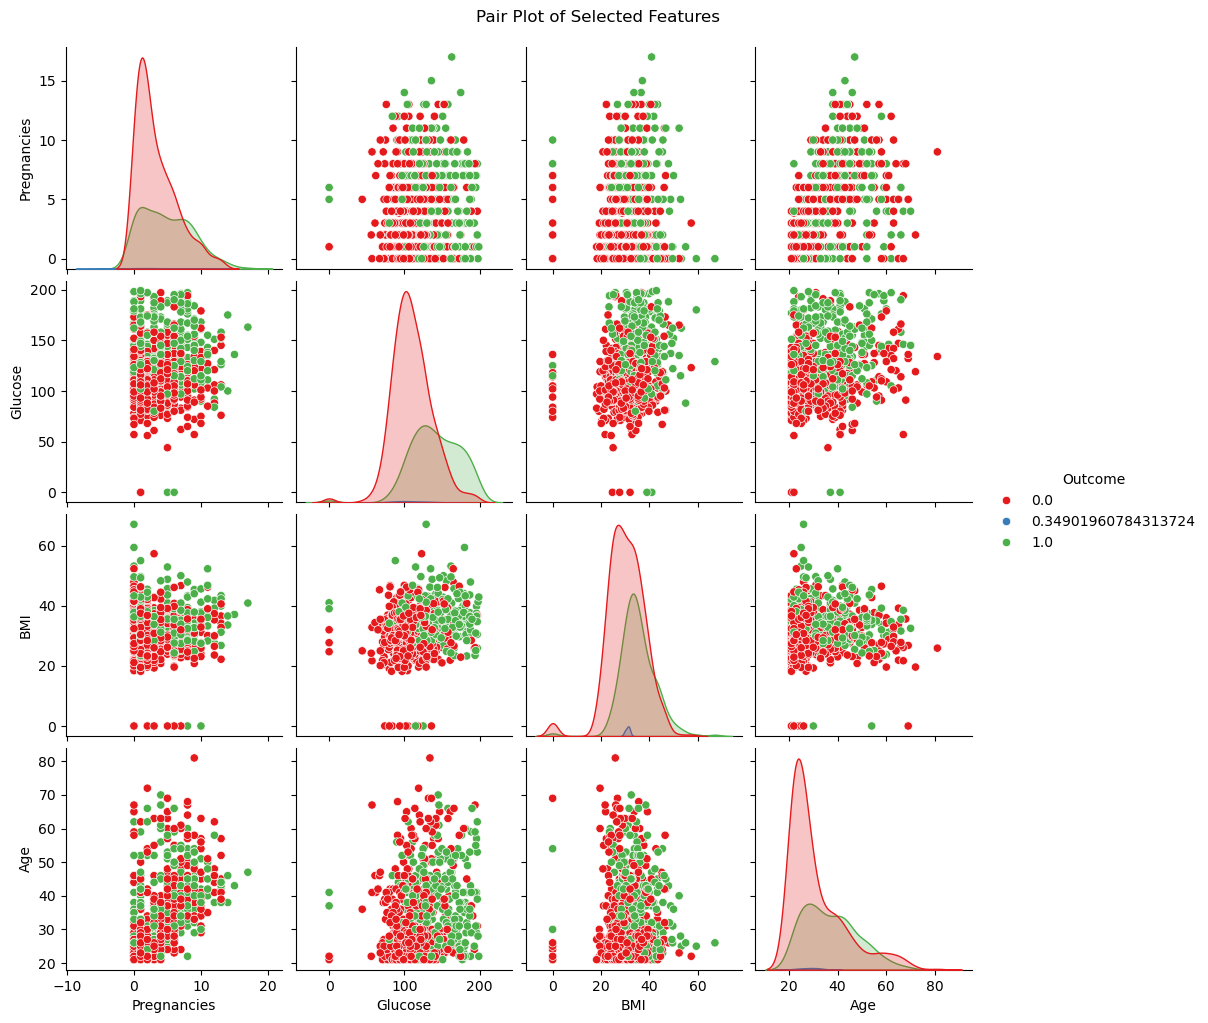

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plot for selected features with different colors based on 'Outcome'
sns.pairplot(data[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']], 
             diag_kind='kde', 
             hue='Outcome', 
             palette='Set1')  # You can choose a different palette if desired

plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()



# Module 4: Statistical Analysis and Advanced Visualizations


## 4.1 Statistical Summary Measures
#### In this section, we will compute summary statistics for numeric features, including mean, median, variance, and skewness.

In [74]:

# Display mean, median, and variance for each numeric column
data_summary = data.describe().T
data_summary['Variance'] = data.var()
data_summary['Skewness'] = data.skew()
data_summary


,count,mean,std,min,25%,50%,75%,max,Variance,Skewness
Pregnancies,768.0,3.850065,3.366713,0.000,1.00000,3.000000,6.000000,17.000000,11.334756,0.901447
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.000000,1022.248314,0.173754
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.000000,80.000000,122.000000,374.647271,-1.843608
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.000000,32.000000,99.000000,254.473245,0.109372
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.500000,127.250000,846.000000,13281.180078,2.272251
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.600000,67.100000,62.159984,-0.428982
DiabetesPedigreeFunction,768.0,0.471995,0.331312,0.078,0.24375,0.372500,0.626250,2.420000,0.109768,1.919145
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.000000,138.303046,1.129597
Outcome,768.0,0.349020,0.476038,0.000,0.00000,0.000000,1.000000,1.000000,0.226612,0.635977
Log_Glucose,768.0,4.747915,0.457368,0.000,4.60517,4.770685,4.950527,5.298317,0.209186,-7.260790


## 4.2 Advanced Visualizations
#### We will create advanced visualizations to gain deeper insights into the data distribution and relationships.

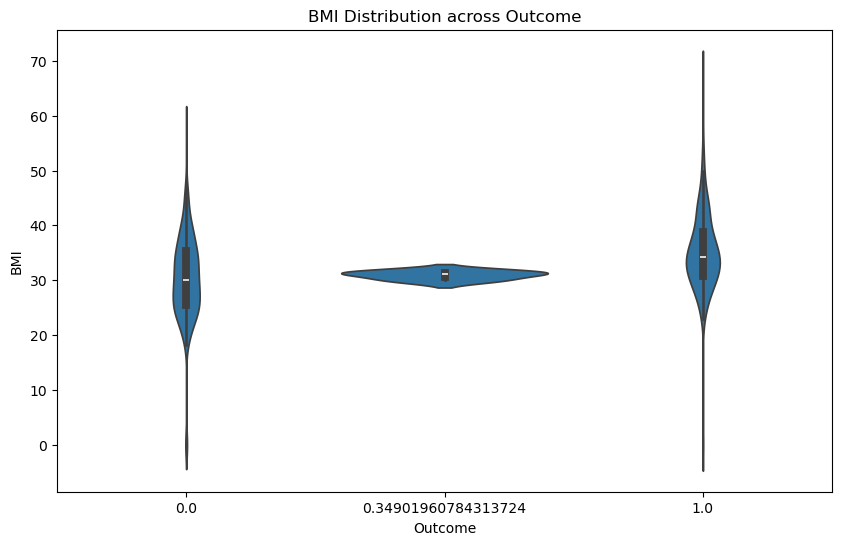

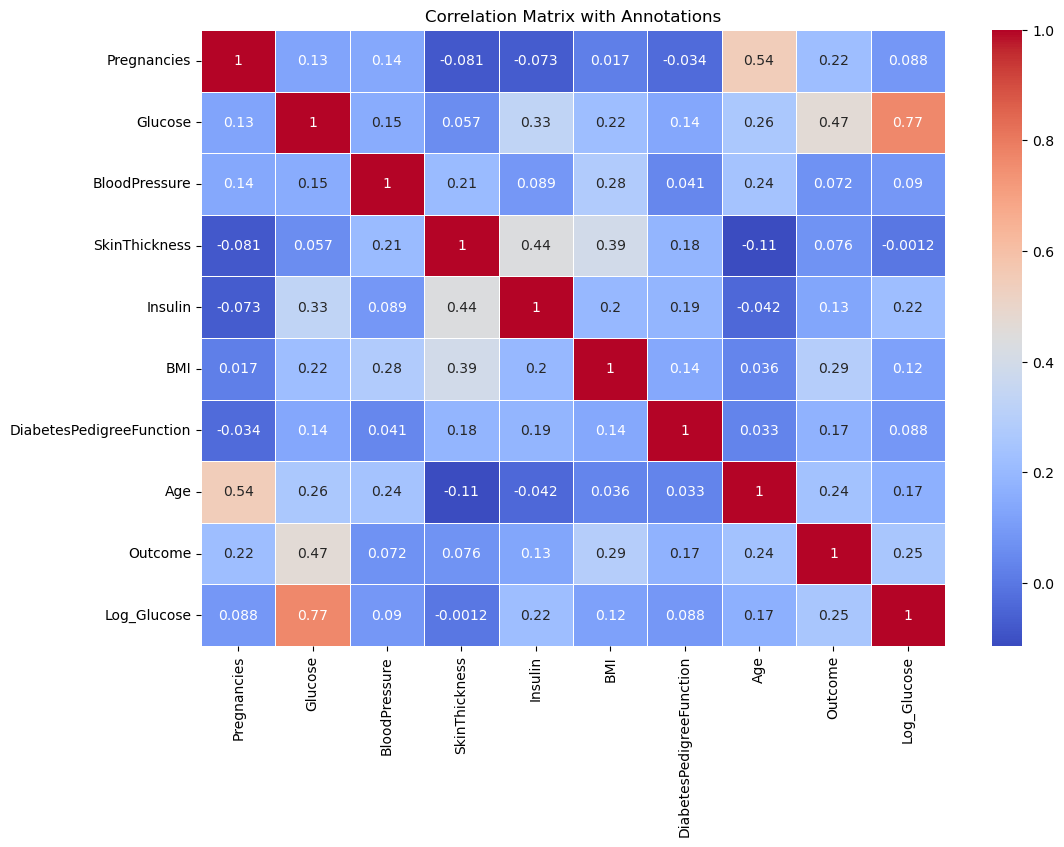

In [75]:

# Violin plot for distribution of BMI across Outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='BMI', data=data)
plt.title('BMI Distribution across Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

# Pairwise correlation with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Annotations')
plt.show()


## 4.3 Contingency Tables
#### We will create and visualize contingency tables to examine the relationship between categorical variables.

Contingency Table for Age and Outcome:
Outcome  0.00000  0.34902  1.00000
Age                               
21            58        0        5
22            61        0       11
23            31        0        7
24            37        1        8
25            34        0       14
26            25        0        8
27            24        0        8
28            25        0       10
29            15        1       13
30            15        0        6
31            11        0       13
32             7        1        8
33             7        0       10
34            10        0        4
35             5        0        5
36             6        0       10
37            13        0        6
38             6        0       10
39             9        0        3
40             7        0        6
41             9        0       13
42            11        0        7
43             2        0       11
44             3        0        5
45             7        0        8
46             6

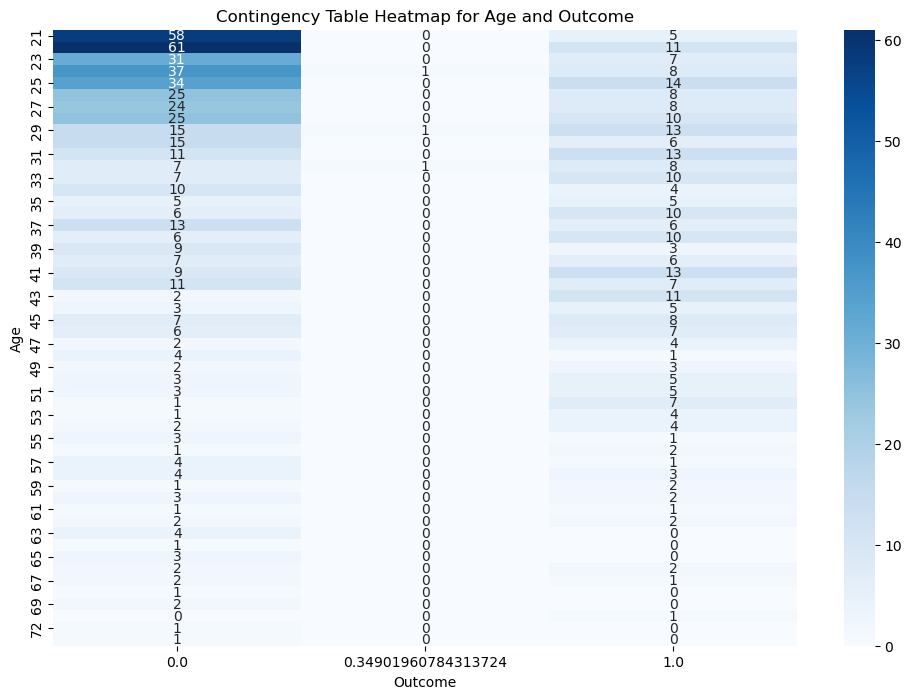

Row Profile Dataset:
Outcome   0.00000   0.34902   1.00000
Age                                  
21       0.920635  0.000000  0.079365
22       0.847222  0.000000  0.152778
23       0.815789  0.000000  0.184211
24       0.804348  0.021739  0.173913
25       0.708333  0.000000  0.291667
26       0.757576  0.000000  0.242424
27       0.750000  0.000000  0.250000
28       0.714286  0.000000  0.285714
29       0.517241  0.034483  0.448276
30       0.714286  0.000000  0.285714
31       0.458333  0.000000  0.541667
32       0.437500  0.062500  0.500000
33       0.411765  0.000000  0.588235
34       0.714286  0.000000  0.285714
35       0.500000  0.000000  0.500000
36       0.375000  0.000000  0.625000
37       0.684211  0.000000  0.315789
38       0.375000  0.000000  0.625000
39       0.750000  0.000000  0.250000
40       0.538462  0.000000  0.461538
41       0.409091  0.000000  0.590909
42       0.611111  0.000000  0.388889
43       0.153846  0.000000  0.846154
44       0.375000  0.000000  

In [76]:
# Create a contingency table for Outcome and Age
contingency_table = pd.crosstab(data['Age'], data['Outcome'])
print("Contingency Table for Age and Outcome:")
print(contingency_table)

# Heatmap for the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='Blues', annot=True)
plt.title('Contingency Table Heatmap for Age and Outcome')
plt.show()

# Row profile dataset
row_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("Row Profile Dataset:")
print(row_profile)

# Column profile dataset
column_profile = contingency_table.div(contingency_table.sum(axis=0), axis=1)
print("Column Profile Dataset:")
print(column_profile)

# Relative frequency dataset
relative_frequency = contingency_table / contingency_table.sum().sum()
print("Relative Frequency Dataset:")
print(relative_frequency)

# Chi-square dataset
chi2_stat = ((contingency_table - contingency_table.mean())**2 / contingency_table.mean()).sum().sum()
print("Chi-square Statistic:", chi2_stat)

## 4.4 Scatter Plots

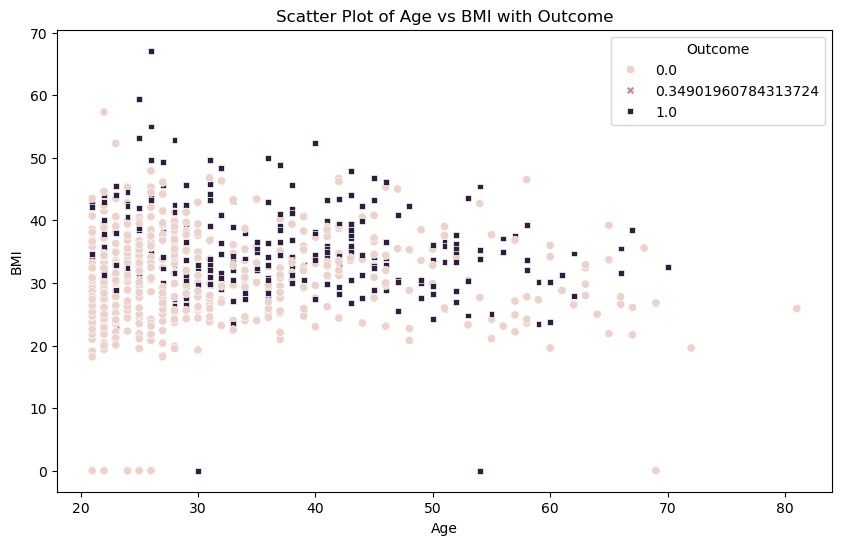

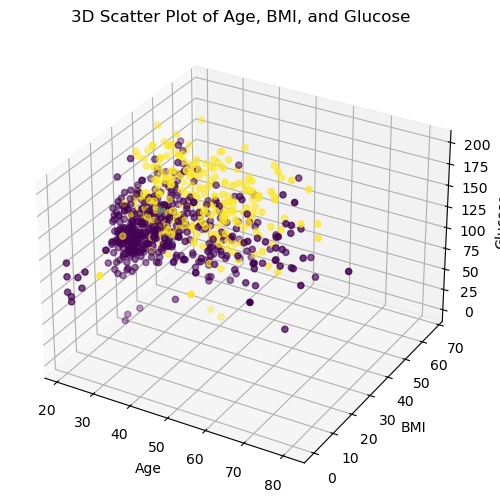

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot for two variables with color and shape changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', style='Outcome', data=data)
plt.title('Scatter Plot of Age vs BMI with Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# 3D scatter plot for three variables
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['BMI'], data['Glucose'], c=data['Outcome'], marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')
plt.title('3D Scatter Plot of Age, BMI, and Glucose')
plt.show()

## 4.5 Boxplot Analysis

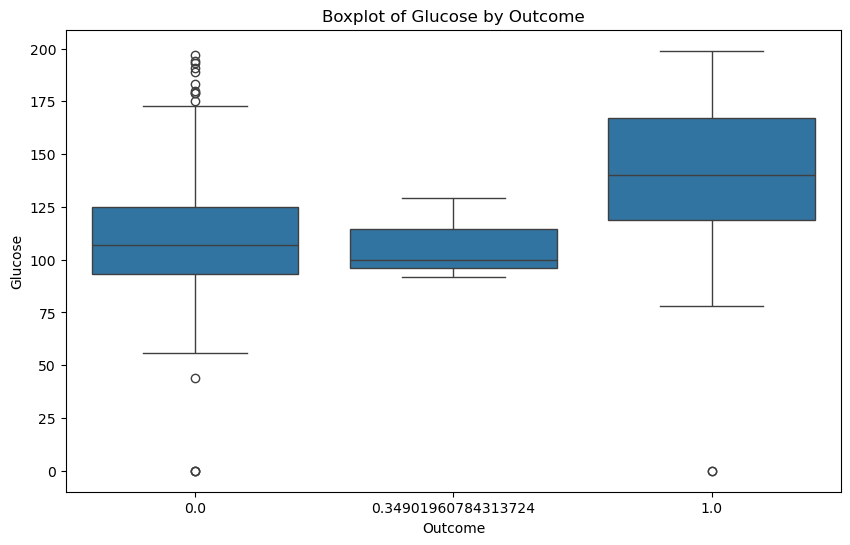

In [78]:
# Boxplot for a categorical variable (e.g., Outcome) against a numeric variable (e.g., Glucose)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Boxplot of Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

## 4.6 Sunray Plot (Radar Chart)

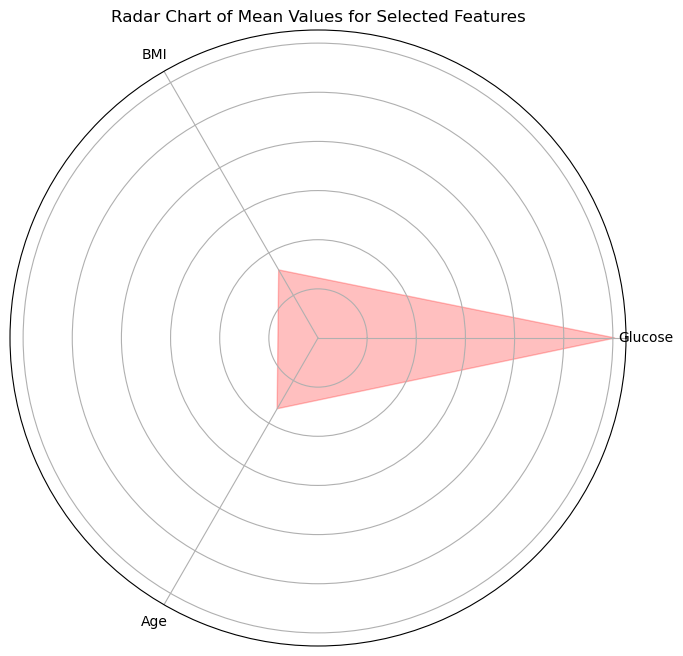

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for the radar chart
categories = ['Glucose', 'BMI', 'Age']
values = [data['Glucose'].mean(), data['BMI'].mean(), data['Age'].mean()]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
values += values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart of Mean Values for Selected Features')
plt.show()

## Module - 5 : **Diabetes Dataset Clustering Analysis using K-Means**

In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

###  5.1 Data preprocessing - scaling the features

In [81]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### 5.2  Applying K-Means Clustering

In [82]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

### 5.3 Cluster Means Analysis

In [83]:
# Calculate the mean values of each feature per cluster
cluster_means = data.groupby('Cluster').mean()
print("Cluster Means:\n", cluster_means)

Cluster Means:
          Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           3.294118  149.858824      75.470588      34.511765  208.529412   
1           2.329510  102.474227      62.969072      19.461340   54.412371   
2           7.109524  131.480952      75.290476      11.209524   22.495238   

               BMI  DiabetesPedigreeFunction        Age   Outcome  Log_Glucose  
Cluster                                                                         
0        37.370000                  0.662453  33.658824  0.729412     4.998712  
1        29.669845                  0.414302  26.533505  0.072286     4.574598  
2        31.930952                  0.424410  45.295238  0.552381     4.865111  


### 5.4 Visualizing Clusters

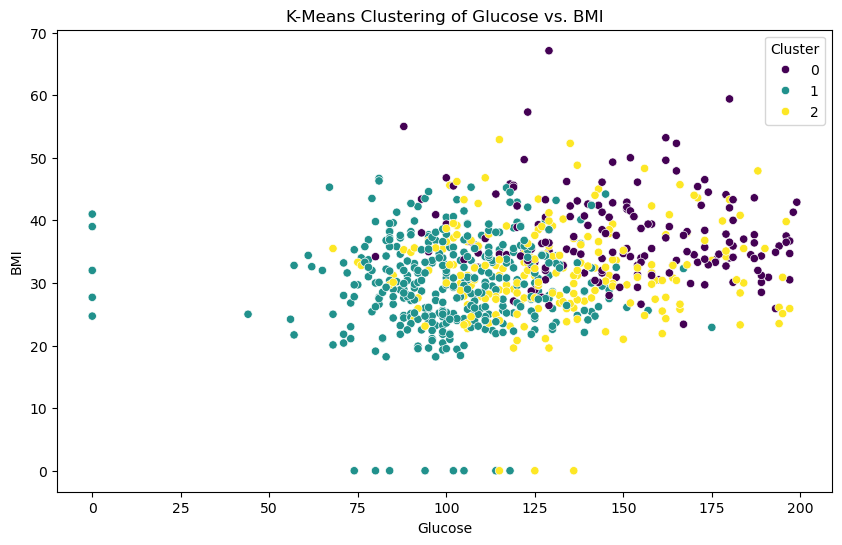

In [84]:
# Visualizing clusters for two features (e.g., Glucose vs. BMI)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering of Glucose vs. BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

### 5.5 Heatmap of Feature Means per Cluster

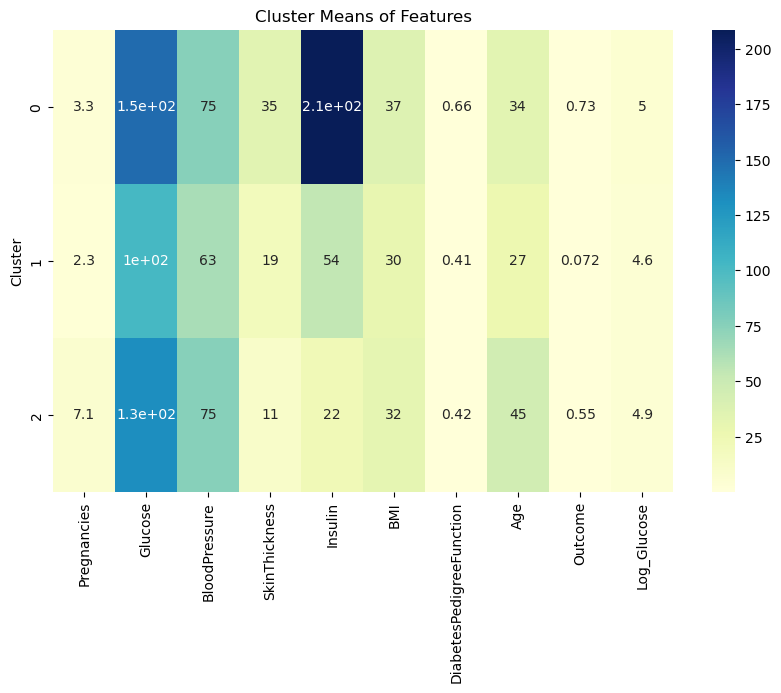

In [85]:
# Heatmap to visualize the feature means per cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features")
plt.show()

## Module 6: **Dimensionality Reduction**

### 6.1 Principal Component Analysis (PCA)

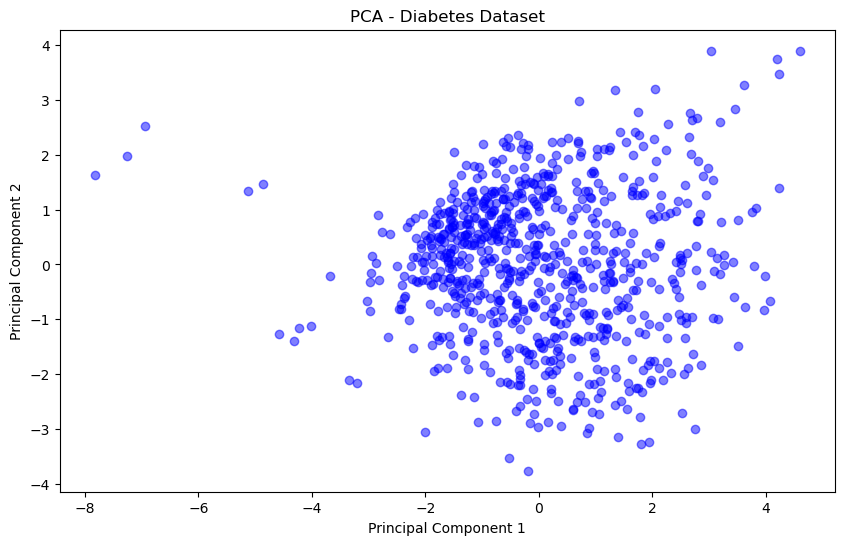

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)
plt.title("PCA - Diabetes Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### 6.2 Singular Value Decomposition (SVD)

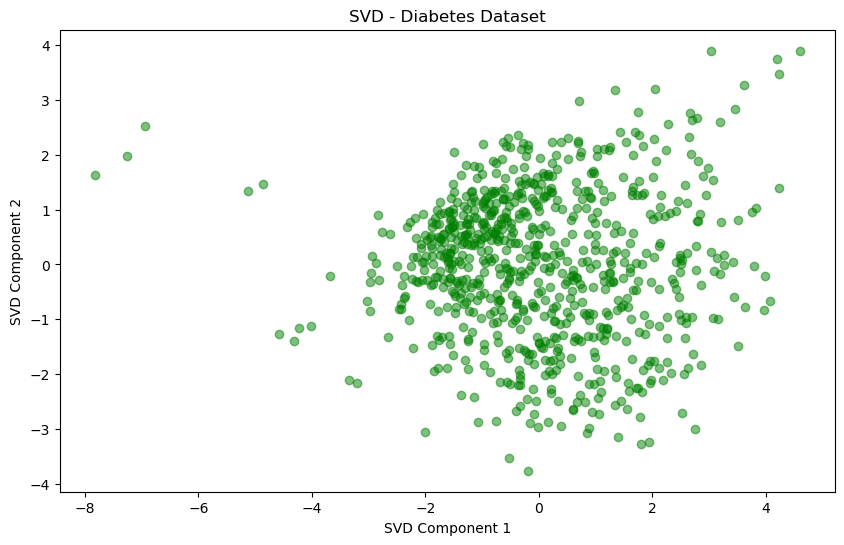

In [87]:
from sklearn.decomposition import TruncatedSVD

# Applying SVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(scaled_data)

# Plotting SVD results
plt.figure(figsize=(10, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], c='green', alpha=0.5)
plt.title("SVD - Diabetes Dataset")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

### 6.3 Factor Analysis (FA)


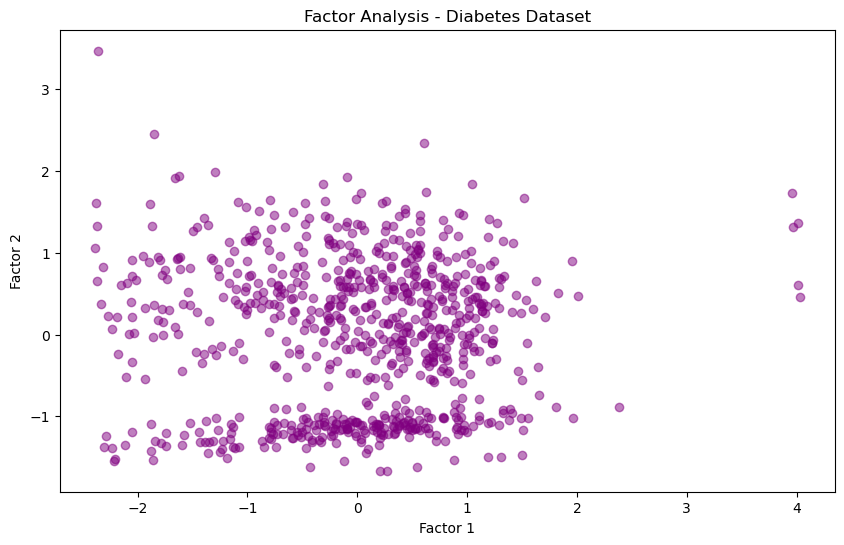

In [88]:
from sklearn.decomposition import FactorAnalysis

# Applying Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_data = fa.fit_transform(scaled_data)

# Plotting Factor Analysis results
plt.figure(figsize=(10, 6))
plt.scatter(fa_data[:, 0], fa_data[:, 1], c='purple', alpha=0.5)
plt.title("Factor Analysis - Diabetes Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

### 6.4. Non-Linear Methods
#### **6.4.1 Multidimensional Scaling (MDS)**

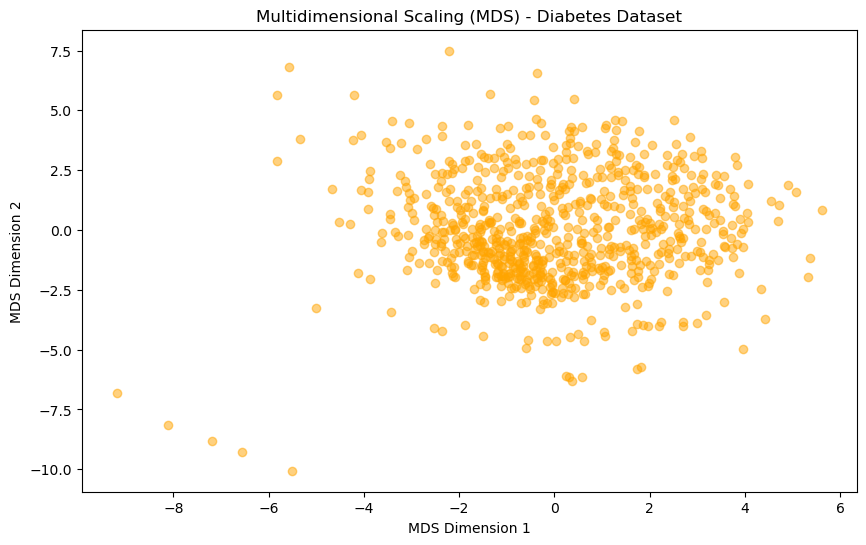

In [89]:
from sklearn.manifold import MDS

# Applying MDS
mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(scaled_data)

# Plotting MDS results
plt.figure(figsize=(10, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], c='orange', alpha=0.5)
plt.title("Multidimensional Scaling (MDS) - Diabetes Dataset")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

### 6.4.2 Manifold Learning (t-SNE)

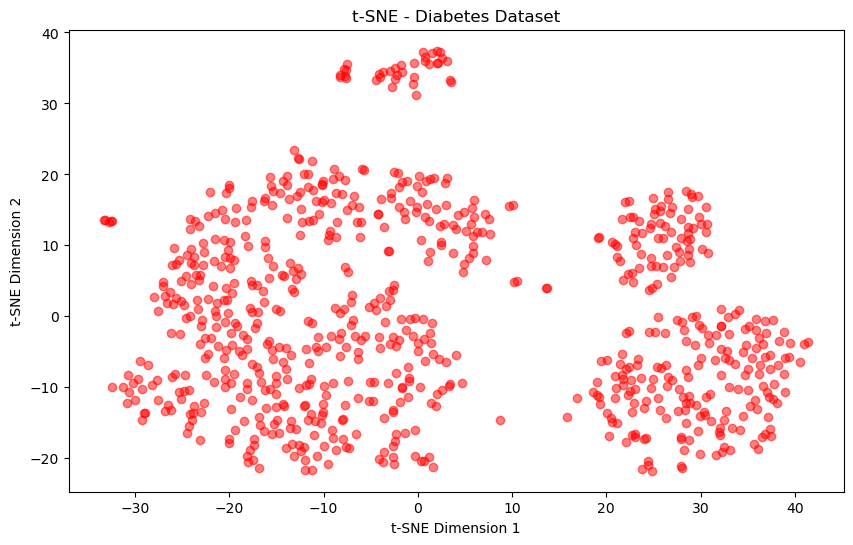

In [90]:
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Plotting t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='red', alpha=0.5)
plt.title("t-SNE - Diabetes Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### 6.4.3 Self-Organizing Maps (SOM)

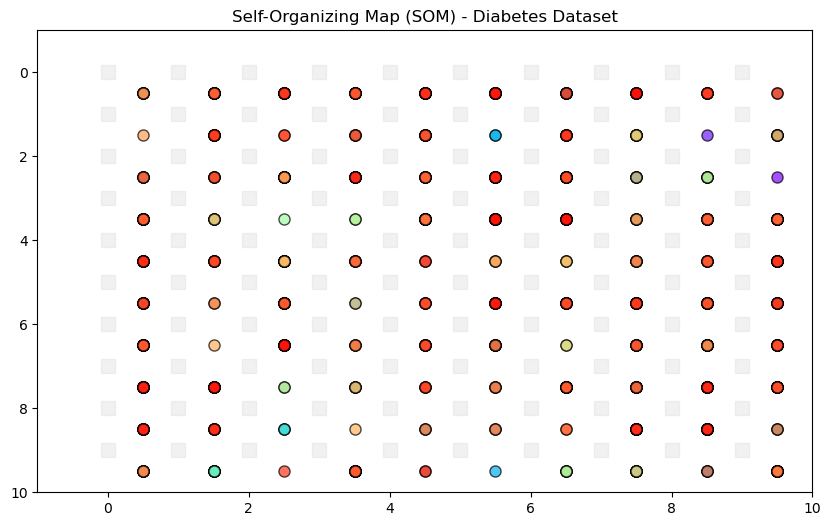

In [91]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# SOM setup
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 100)

# Plotting the SOM
plt.figure(figsize=(10, 6))

# Create a background grid
for i in range(10):
    for j in range(10):
        plt.scatter(i, j, s=100, c='lightgray', alpha=0.3, marker='s')

# Plot each data point in the SOM space based on the winning node
for i, x in enumerate(scaled_data):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.rainbow(i / len(scaled_data)),
             markeredgecolor='k', markersize=8, alpha=0.7)

plt.title("Self-Organizing Map (SOM) - Diabetes Dataset")
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.gca().invert_yaxis() 
plt.show()


## Module 7: Model Development and Evaluation

### 7.1 Constructing a Linear Regression Model

In [92]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

### 7.1.1 Selecting features and target variable (assuming 'Outcome' is the target)

In [93]:
# Selecting features and target variable (assuming 'Outcome' is the target)
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable

### 7.1.2 Split the dataset into training and testing sets

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 7.1.3 Initialize and train the linear regression model

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### 7.1.4 Calculate and display evaluation metrics

In [96]:
# Calculate and display evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### 7.1.5 Convert predictions to binary output (0 or 1) for accuracy if Outcome is binary

In [97]:
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred_binary)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Accuracy:", accuracy)

Mean Squared Error: 0.179767620504464
R-squared: 0.20591225184282247
Accuracy: 0.7532467532467533


### 7.2 Basics of Reinforcement Learning (RL)

### **Important**
##### This is not related to the said dataset. Moreover this is just a simple represnation of reinforcement Learning

In [98]:
import gym

# Create your environment
env = gym.make('CartPole-v1')  # Replace with your environment

# Initialize environment
state = env.reset()
done = False
total_reward = 0

while not done:
    # Take random action
    action = env.action_space.sample()

    # Take step in environment and unpack the result
    result = env.step(action)

    # Check how many values are returned by `env.step()`
    if len(result) == 5:
        # Unpack the result when 5 values are returned
        next_state, reward, done, terminated, info = result
    elif len(result) == 4:
        # Unpack the result when 4 values are returned (for older versions of Gym)
        next_state, reward, done, info = result
        terminated = False  # Set a default value for terminated if not present
    elif len(result) == 3:
        # Unpack the result when 3 values are returned (older environments)
        next_state, reward, done = result
        terminated = False  # Set a default value for terminated if not present
        info = {}  # Add an empty dictionary for `info` if it's not returned
    else:
        raise ValueError(f"Unexpected result from env.step(action): {result}")

    # Update total reward and state
    total_reward += reward
    state = next_state

    # Optionally, render the environment
    # env.render()

print(f"Total Reward: {total_reward}")
env.close()

Total Reward: 14.0
